**MSBA 6330 Final Project
Tony Forneris, Mark Kuck, Dylan Kuntz, Santi Strasser**

This notebook documents the steps involved in querying the twitter api to get a set of tweets related to the deletefacebook campaign. We then use this twitter data and call it against the Natural Language Processing API offering through the Google Cloud Platform. The ouptut in a dataframe of tweets with their relative sentiment.

**STEP 4:** 

Setting up the twitter API. This inputs the keys and tokens, and then creates a api object that we can use to call the twitter api.

In [2]:
!pip install twitter

  Using cached https://files.pythonhosted.org/packages/85/e2/f602e3f584503f03e0389491b251464f8ecfe2596ac86e6b9068fe7419d3/twitter-1.18.0-py2.py3-none-any.whl
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
#import the twitter library
from twitter import *

#auth keys/tokens from twitter API, we need to use a gitignore page when we post this information to the github repository
consumer_key = ''
consumer_secret = ''
oauth_token = ''
oauth_token_secret = ''

#load the twitter keys/tokens into the api to establish connection and make a twitter api object
api = Twitter(
    auth=OAuth(oauth_token, oauth_token_secret, consumer_key, consumer_secret))

#print that object
print(api)

**STEP 2:**

This step uses two functions. One calls the twitter API and then the other captures the relevant information from the JSON output we received from the twitter API.

In [5]:
#import libraries
import time

#this function calls the twitter api and collects tweets into a list and outputs list
def collect_tweets(): 
    tweet_data = []
    count = 0
    
    while (count < 360):
        time.sleep(5)
        
        q = 'facebook' 
        numoftweets = 100 #the maximum is 100

        
        search_results = api.search.tweets(q=q, count=numoftweets,result_type='recent', lang='en')

        statuses = search_results['statuses']
        tweet_data.append(statuses)
        count = count + 1
        
    return(tweet_data)

#this function loops through the list of tweets and stores the relevant information into a list that is outputted.
def parse_tweets(input):
    #empty list to store information
    final_data = []
    
    for request in input:
        for status in request:
            #relevant information that we want to store from the tweets
            tweet_id = status['id']
            text = status['text']
            time = status['created_at']
            retweet_count = status['retweet_count']
            fav_count = status['user']['favourites_count']
            location = status['user']['location']
            
            tweet_list = [text, time, retweet_count, fav_count, location, tweet_id]
            #append the tweet_list above to our collection of lists - final_data
            final_data.append(tweet_list)
    
    return(final_data)

**STEP 3:**

Here we collect the tweets and test to make sure that it works properly.

In [6]:
twitter_data = parse_tweets(collect_tweets())

In [7]:
print(twitter_data[0:2])

[['Use of force points.... https://t.co/umbHdJpL7P', 'Fri Apr 27 20:42:04 +0000 2018', 0, 88, 'Way Rural Nevada', 989967939414605824], ['On Friday 4-20-2018 the single suspect below entered the victim’s residence located at  N Hayston at approximately… https://t.co/33p7k3SBc2', 'Fri Apr 27 20:42:03 +0000 2018', 0, 0, 'Central Valley, California', 989967938718519310]]


In [10]:
#check the length of the twitter data list
len(twitter_data)

35997

**STEP 4:**

Here we are importing the keys for the google api and then have wrote a function that uses the collection of tweets that we have. It will call each tweet against the NLP Google API and return a score and magnitude for the sentiment of the tweet. We then capture that information and output into a data frame.

In [11]:
!pip install os

  Could not find a version that satisfies the requirement os (from versions: )
No matching distribution found for os
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
#import libraries
import os
#set the google api location for credentials
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/datalab/msba6330finalproject-9976d7f519eb.json"
#%run 'msba6330finalproject-9976d7f519eb.json'
# Imports the Google Cloud client library
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types


def sent_analysis():
    # Instantiates a client
    client = language.LanguageServiceClient()

    new_list = []
    count1 = 0
    
    #sometimes the google api will not be able to analyze different tweets, 
    #so we have built an error handling function that will not include the errored tweets
    
    while count1 < (len(twitter_data)):
        try:
            # The text to analyze
            text = twitter_data[count1][0]
            document = types.Document(
            content=text,
            type=enums.Document.Type.PLAIN_TEXT)
        
            # Detects the sentiment of the text
            sentiment = client.analyze_sentiment(document=document).document_sentiment
        
            #append the list of data to collection of data - new_list
            new_list.append([twitter_data[count1][0], twitter_data[count1][1],twitter_data[count1][2],twitter_data[count1][3],twitter_data[count1][4],twitter_data[count1][5],sentiment.score, sentiment.magnitude])
        
        except:
            print ("The Google API was unable to analyze the tweet in row " + str(count1))
            print ("The tweet that errored in row " + str(count1) + " was: " + "'" + str(twitter_data[count1][0]) + "'")
        
        count1 = count1 + 1
        
    return new_list

test_sentiment = sent_analysis()

The Google API was unable to analyze the tweet in row 618
The tweet that errored in row 618 was: 'RT @ZitCent: .#DBZ/#DragonBallSuper : #InfinityWar Trailer ! AN AMAZING edit/compilation by #DBZ Exclusives (https://t.co/21FRCOt8T0) 🔥 #Ma…'
The Google API was unable to analyze the tweet in row 623
The tweet that errored in row 623 was: 'RT @JahanpanahInd: Royal Challengers Bangalore  (VS) Chennai Super Kings
Who is going to be the Jahanpanah of the Day...? Show your support…'
The Google API was unable to analyze the tweet in row 627
The tweet that errored in row 627 was: 'One of the thing I like about blogging is that it can open a lot of doors for you to amplify your message. I am pas… https://t.co/xl3BCc0q8J'
The Google API was unable to analyze the tweet in row 629
The tweet that errored in row 629 was: 'RT @santafeez: Received today from Professor Asad Abu Sharkh via Ahmed Burtema of the #GreatReturnMarch

"A call to the international commu…'
The Google API was unable to analyze the

In [44]:
len(test_sentiment)

686

In [45]:
print(test_sentiment[0:2])

[["RT @PhilSeahorn: 41 YEARS OF MY RESEARCH INTO ALL THINGS ALIEN AND U.F.O.'S, GO TO MY FACEBOOK PAGE\nhttps://t.co/5zGYrTABRr https://t.co/be…", 'Tue Apr 24 23:59:59 +0000 2018', 1, 24, 'Spokane, WA', 988930585321091072, -0.4000000059604645, 0.4000000059604645], ['RT @TomiLahren: This is how the world responds when our president is Trump and not namby-pamby Obama. https://t.co/CINfVX5gtc', 'Tue Apr 24 23:59:59 +0000 2018', 202, 215980, 'East Patchogue, NY', 988930585308647424, 0.0, 0.10000000149011612]]


In [46]:
import pandas as pd
import numpy as np
#set the floats to 8 decimal points
pd.set_option("display.precision", 8)

#creat column headings
data_cols = ['Tweet', 'Date', 'Retweet_Count', 'Favorite_Count', 'Location', 'Tweet_id','Sent_Score', 'Sent_Magnitude']

#create dataframe of our data
df2 = pd.DataFrame(data=test_sentiment, columns=data_cols)

In [47]:
df2.head()

,Tweet,Date,Retweet_Count,Favorite_Count,Location,Tweet_id,Sent_Score,Sent_Magnitude
0,RT @PhilSeahorn: 41 YEARS OF MY RESEARCH INTO ...,Tue Apr 24 23:59:59 +0000 2018,1,24,"Spokane, WA",988930585321091072,-0.40000001,0.40000001
1,RT @TomiLahren: This is how the world responds...,Tue Apr 24 23:59:59 +0000 2018,202,215980,"East Patchogue, NY",988930585308647424,0.00000000,0.10000000
2,I'm dead about to deactivate Facebook.😬 Fr thi...,Tue Apr 24 23:59:59 +0000 2018,0,795,Trenton NJ,988930583941271552,-0.40000001,0.40000001
3,RT @kinekt_hq: Kinekt Terminals Bounty and Air...,Tue Apr 24 23:59:59 +0000 2018,920,483,,988930583286894592,0.80000001,0.80000001
4,Nothing Personal Inc..It Looks Like My Summer ...,Tue Apr 24 23:59:58 +0000 2018,0,24,New York City.,988930582179545088,0.30000001,0.69999999


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


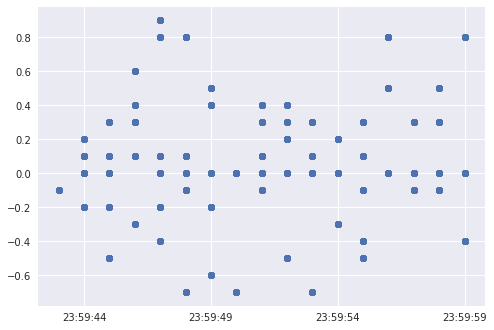

In [67]:
#creating a plot to 
import matplotlib.pyplot as plt
import numpy as np

#turn the dates into datetime
df2['Date'] = pd.to_datetime(df2['Date'])

plt.plot_date(df2['Date'], df2['Sent_Score'])


In [68]:
test = df2.groupby(['Date'])['Sent_Score'].mean()

In [69]:
test

Date
2018-04-24 23:59:43   -0.10000000
2018-04-24 23:59:44    0.01754386
2018-04-24 23:59:45   -0.05000000
2018-04-24 23:59:46    0.23947369
2018-04-24 23:59:47    0.13921568
2018-04-24 23:59:48    0.00487805
2018-04-24 23:59:49    0.03235294
2018-04-24 23:59:50   -0.18148148
2018-04-24 23:59:51    0.10555556
2018-04-24 23:59:52    0.04482759
2018-04-24 23:59:53    0.00681819
2018-04-24 23:59:54   -0.04347826
2018-04-24 23:59:55   -0.10285714
2018-04-24 23:59:56    0.45128206
2018-04-24 23:59:57    0.00588235
2018-04-24 23:59:58    0.10338983
2018-04-24 23:59:59    0.00000000
Name: Sent_Score, dtype: float64

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

os.chdir('C:/Users/santi/Desktop')
#https://www.google.com/finance/getprices?i=60&p=1d&f=d,o,h,l,c,v&df=cpct&q=FB

df = pd.read_csv('fb.csv')

df[['TIMESTAMP','CLOSE','HIGH','LOW','OPEN','VOLUME']] = df[['TIMESTAMP','CLOSE','HIGH','LOW','OPEN','VOLUME']].apply(pd.to_numeric)

df.index = pd.to_datetime(df['TIMESTAMP'], unit='s')

#pd.Series(datetime.datetime.fromtimestamp(df[['TIMESTAMP']]).strftime('%Y-%m-%d %H:%M:%S'))

plt.plot('CLOSE',data=df)

plt.show()